# Writing a Data Scientist Blog Post Project

### Business Understanding

In [ ]:
-What are skills/attributes that developers can employ in order to make more money and be happier? -Skills including problem solving and abilities to learn new things are likely helpful. -Experience is likely the most helpful attributes to have to increase salary and happiness.

# Data Understanding

In [3]:
#importing libraries needed 
#importing numpy package
import numpy as np
#importing pandas package
import pandas as pd
#importing matplotlib package
import matplotlib.pyplot as plot  
%matplotlib inline

#read in data 
df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')
#view first 5 rows
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#visualizing the questions of the survey
schema_string = schema.to_string()
print(schema_string)

                               Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [170]:
#finding the number of nan values in the columns needed for our questions
selected_columns = [31,29,12,19,18,152,83]
missing_values_count = df.iloc[:, selected_columns].isna().sum()
print(missing_values_count)

LearningNewTech       20088
ProblemSolving        20099
YearsCodedJob         10502
JobSatisfaction           0
CareerSatisfaction     8697
Salary                    0
EducationTypes        21038
dtype: int64


In [18]:
#visualizing the column "YearsCodedJob" to see what the counts for each answer is ffrom the survey
def barplot(YearsCodedJob):
    '''
    This function will make a count of every answer gave in the survey to the question, "how many years have you coded in your job" and plot it in a bar plot
    
    Input:
    'YearsCodedJob'
    
    Output:
    Bar plot of counts of answers to survey question
    
    '''
    counts = df['YearsCodedJob'].value_counts()
    (counts/df.shape[0]).plot(kind="bar")
    plot.title("Years Coded Job Survey Answers")
    plot.show()

# Data Preparation

In [128]:
#viewing first five salary values for respondents
salary = df['Salary'].value_counts()
salary.head()
#filling in nan salary values with mean
mean_sal = df['Salary'].mean()
df['Salary'].fillna(mean_sal, inplace=True)
salary.head()

Salary
56298.480641     38501
120000.000000      167
110000.000000      164
100000.000000      155
75000.000000       149
Name: count, dtype: int64

In [ ]:
For the salary column I decided to drop and fill with the mean as the filled responses are all integers, therefore a fill with mean I believed was appropriate.

In [127]:
#viewing first five job satisfaction values for respondents
Job_S = df['JobSatisfaction'].value_counts()
Job_S.head()
#filling in nan job satisfaction values with mean
mean_job = df['JobSatisfaction'].mean()
df['JobSatisfaction'].fillna(mean_job, inplace=True)
Job_S.head()

JobSatisfaction
6.957078    11016
8.000000     8983
7.000000     7969
9.000000     5573
6.000000     4726
Name: count, dtype: int64

In [ ]:
Similarly with Job Satisfaction all of the responses were integers therefore I went with the mean to fill.

In [ ]:
For the next four columns for which I needed to deal with missing values, I used fowardfill and backward fill since the missing values were categorical and I thought the mean would create a bias towards the most common answer.

In [130]:
#viewing first five years coded in job values for respondents
years_coded = df['YearsCodedJob'].value_counts().reset_index()
years_coded.head()
#filling in nan 'YearsCodedJob' values through back anf foward filling
years_coded.fillna(method='ffill')
years_coded.fillna(method='bfill')

,YearsCodedJob,count
0,1 to 2 years,5289
1,2 to 3 years,4767
2,3 to 4 years,4003
3,4 to 5 years,3405
4,20 or more years,3067
5,Less than a year,3034
6,5 to 6 years,2990
7,9 to 10 years,1956
8,6 to 7 years,1912
9,10 to 11 years,1678


In [131]:
#viewing the first five values from the 'ProblemSolving' column
answers_size = df['ProblemSolving'].value_counts().reset_index()
answers_size.head()
#filling in nan 'ProblemSolving' values through back and foward filling
answers_size.fillna(method='ffill')
answers_size.fillna(method='bfill')

,ProblemSolving,count
0,Strongly agree,18040
1,Agree,11084
2,Somewhat agree,1890
3,Disagree,179
4,Strongly disagree,100


In [171]:
#viewing the first five values from the 'LearningNewTech' column
answers_remote = df['LearningNewTech'].value_counts().reset_index()
answers_remote.head()
#filling in nan 'LearningNewTech' values through back and foward filling
answers_remote.fillna(method='ffill')
answers_remote.fillna(method='bfill')

,LearningNewTech,count
0,Strongly agree,15318
1,Agree,12452
2,Somewhat agree,3042
3,Disagree,370
4,Strongly disagree,122


In [159]:
#viewing the first five answers to the 'EducationTypes' column
gif_a = df['EducationTypes'].value_counts().reset_index()
gif_a.head()
#filling in the nan 'EducationTypes' values through back and foward filling
gif_a.fillna(method='ffill')
gif_a.fillna(method='bfill')

,EducationTypes,count
0,Self-taught,3691
1,Online course; Self-taught,1875
2,Self-taught; Open source contributions,1751
3,On-the-job training; Self-taught,1687
4,Online course; On-the-job training; Self-taught,1276


In [172]:
#viewing the first five answers to the 'CareerSatisfaction' columns
ser = df['CareerSatisfaction'].value_counts().reset_index()
ser.head()
#filling in the nan 'CareerSatisfaction' values with the columns mean
mean_career = df['CareerSatisfaction'].mean()
df['CareerSatisfaction'].fillna(mean_career, inplace=True)
ser.head()

,CareerSatisfaction,count
0,8.0,11037
1,7.0,9384
2,9.0,5579
3,10.0,5408
4,6.0,4721


# Evaluation for Question 1

### Do Developers Who Have Coded For Longer as a Part of Their Job Have a Higher or Lower Salary and Job Satisfaction?

In [121]:
#viewing the table of coorelation of salary and years of coding in job
hap = df.groupby('YearsCodedJob')['Salary'].mean().sort_values()
hap

YearsCodedJob
1 to 2 years        50495.115235
2 to 3 years        50691.924426
Less than a year    50954.113910
3 to 4 years        52402.384680
4 to 5 years        54327.931367
5 to 6 years        54956.728462
6 to 7 years        56711.307522
7 to 8 years        57257.831479
9 to 10 years       58586.474457
8 to 9 years        59904.787598
10 to 11 years      60022.014082
11 to 12 years      61228.669937
13 to 14 years      63565.479700
15 to 16 years      63722.926266
16 to 17 years      63976.813265
14 to 15 years      64142.025914
12 to 13 years      65398.242926
19 to 20 years      65498.459430
18 to 19 years      66724.317711
17 to 18 years      67174.827596
20 or more years    67836.744691
Name: Salary, dtype: float64

### Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

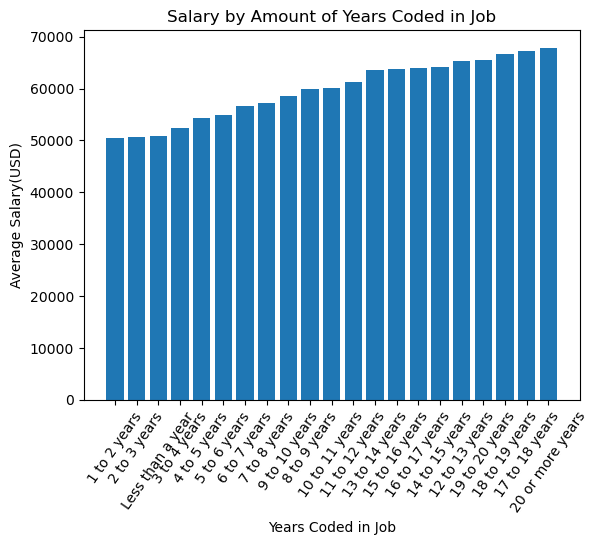

In [195]:
#making graph displaying the coorelation of salary and years of coding in job
plot.bar(hap.index, hap)
plot.xlabel('Years Coded in Job')
plot.ylabel('Average Salary(USD)')
plot.title("Salary by Amount of Years Coded in Job")
plot.xticks(rotation=55)
plot.show

In [125]:
#analyzing the coorelation of job satisfaction and years of coding in job
sal = df.groupby('YearsCodedJob')['JobSatisfaction'].mean().sort_values()
sal

YearsCodedJob
1 to 2 years        6.723925
3 to 4 years        6.841831
2 to 3 years        6.856862
Less than a year    6.894608
4 to 5 years        6.895517
5 to 6 years        6.960404
12 to 13 years      6.999363
9 to 10 years       7.026846
8 to 9 years        7.037549
6 to 7 years        7.048833
7 to 8 years        7.053687
13 to 14 years      7.081893
10 to 11 years      7.092753
14 to 15 years      7.096188
11 to 12 years      7.115818
19 to 20 years      7.125358
16 to 17 years      7.144853
18 to 19 years      7.150406
15 to 16 years      7.166574
17 to 18 years      7.221231
20 or more years    7.325290
Name: JobSatisfaction, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

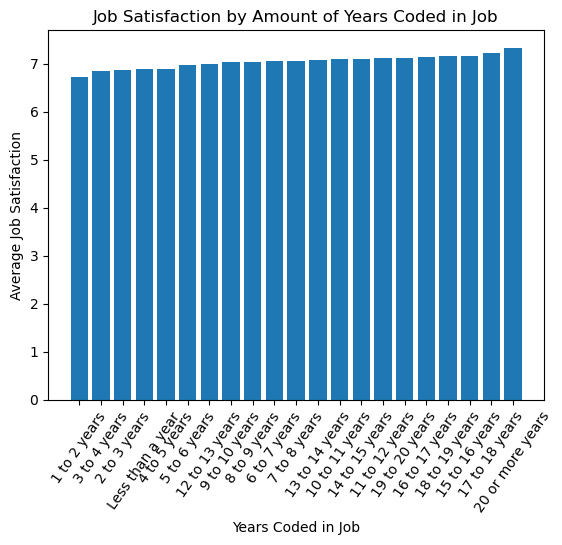

In [196]:
#visualization of coorelation of job satisfaction and years of coding in job
plot.bar(sal.index, sal)
plot.xlabel('Years Coded in Job')
plot.ylabel('Average Job Satisfaction')
plot.title("Job Satisfaction by Amount of Years Coded in Job")
plot.xticks(rotation=55)
plot.show

In [ ]:
Through the two bar plots, it is clear that salary and job satisfaction both increase steadily as the amount of years coded int he job increases.

#  Evaluation for Question 2

### Do Devlopers Who Enjoy Learning New Technologies Have Higher Salaries and Job Satisfaction?

In [ ]:
#viewing table displaying values related to the coorelation of the the level of aggreement to the statement, "I enjoy learning new technologies" and the respondent's salary
newt = df.groupby('LearningNewTech')[('Salary')].mean().sort_values()
newt

### Visualizing

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

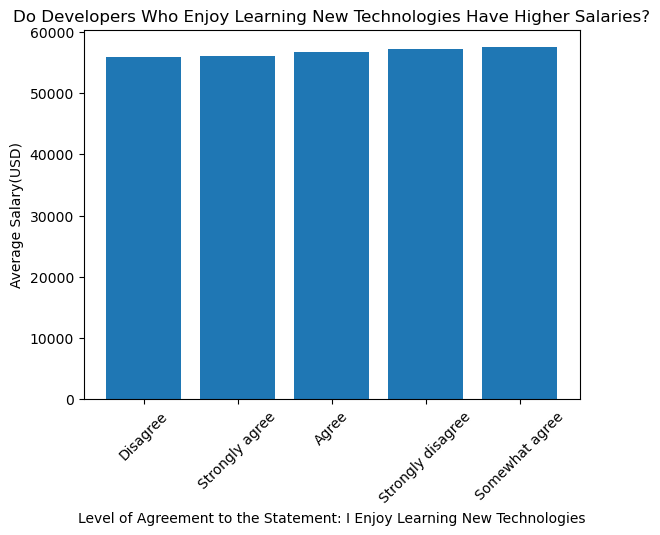

In [210]:

#creating graph displaying the coorelation of the the level of aggreement to the statement, "I enjoy learning new technologies" and the respondent's salary
plot.bar(newt.index, newt)
plot.xlabel("Level of Agreement to the Statement: I Enjoy Learning New Technologies")
plot.ylabel("Average Salary(USD)")
plot.title("Do Developers Who Enjoy Learning New Technologies Have Higher Salaries?")
plot.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

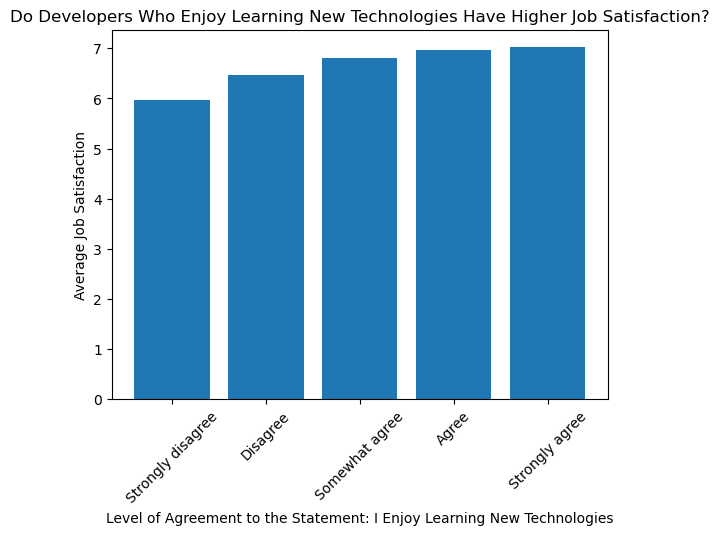

In [211]:
#analyzing values related to the coorelation of the the level of aggreement to the statement, "I enjoy learning new technologies" and the respondent's job satisfaction
newt_JS = df.groupby('LearningNewTech')[('JobSatisfaction')].mean().sort_values()
newt_JS
#Visualizing the coorelation of the the level of aggreement to the statement, "I enjoy learning new technologies" and the respondent's job satisfaction
plot.bar(newt_JS.index, newt_JS)
plot.xlabel("Level of Agreement to the Statement: I Enjoy Learning New Technologies")
plot.ylabel("Average Job Satisfaction")
plot.title("Do Developers Who Enjoy Learning New Technologies Have Higher Job Satisfaction?")
plot.xticks(rotation=45)

In [ ]:
Through the two graphs it is clear as the respondents who strongly disagreeed to the statement move up to the respondants who strongly agree with the statement, the salary and job satifaction increses.

# Evaluation for Question 3

### Do Developers Who Enjoy Problem Solving Have Higher Salaries and Job Satisfactions?

In [ ]:
#viewing values for the coorelation of the responses to "I enjoy problem solving" and respondent's salary
solv = df.groupby('ProblemSolving')[('Salary')].mean().sort_values()
solv

### Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

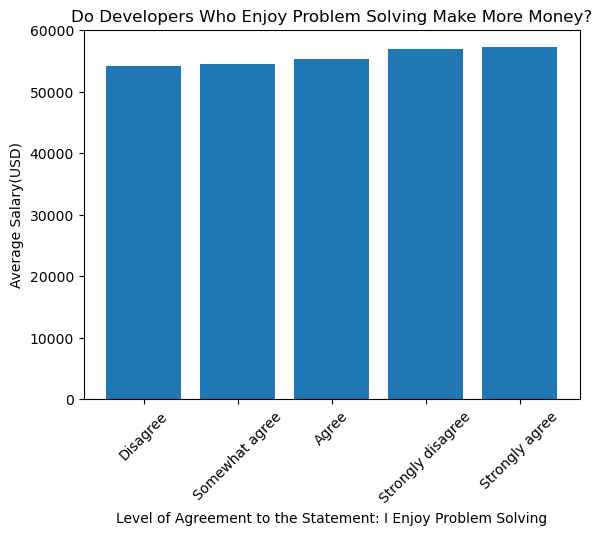

In [209]:

#creating graph displaying the coorelation of the responses to "I enjoy problem solving" and respondent's salary
plot.bar(solv.index,solv)
plot.xlabel("Level of Agreement to the Statement: I Enjoy Problem Solving")
plot.ylabel("Average Salary(USD)")
plot.title("Do Developers Who Enjoy Problem Solving Make More Money?")
plot.xticks(rotation=45)
plot.show

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

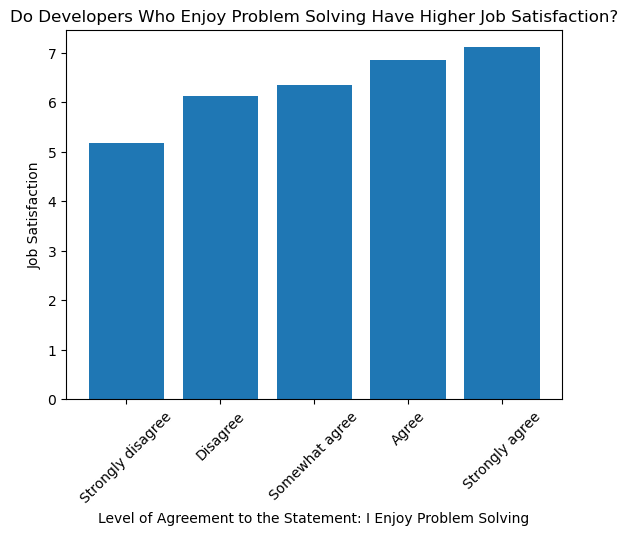

In [19]:
#Analyzing the coorelation of the response to the question "I enjoy problem solving" and respondent's job satisfaction
solv_JS = df.groupby('ProblemSolving')[('JobSatisfaction')].mean().sort_values()
solv_JS
#Visualizing the coorelation of the response to the question "I enjoy problem solving" and respondent's job satisfaction
plot.bar( solv_JS.index, solv_JS)
plot.xlabel("Level of Agreement to the Statement: I Enjoy Problem Solving")
plot.ylabel("Job Satisfaction")
plot.title("Do Developers Who Enjoy Problem Solving Have Higher Job Satisfaction?")
plot.xticks(rotation=45)
plot.yticks(size=10)

In [ ]:
It is clear that as the respondant move from strongly disagree to strongly agree to the statement, the salary and job satisfaction increases steadily.